# Toyota Data Analysis

# Import data into python, make a copy of the data and display the data information

In [1]:
import pandas as pd
cars = pd.read_csv("Toyota.csv", index_col=0, na_values=["??","????"])
cars1 = cars.copy()  #cars dataframe is copied in cars1
cars1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   float64
 6   Automatic  1436 non-null   int64  
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 123.4+ KB


## Correct the data types for the appropriate columns

In [2]:
import numpy as np
cars1['MetColor'] = cars1['MetColor'].astype('object')
cars1['Automatic'] = cars1['Automatic'].astype('object')
cars1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   object 
 6   Automatic  1436 non-null   object 
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   object 
 9   Weight     1436 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 123.4+ KB


In [3]:
print(np.unique(cars1['Doors']))

['2' '3' '4' '5' 'five' 'four' 'three']


In [4]:
cars1['Doors'].replace("three",3, inplace=True)
cars1['Doors'].replace("four",4, inplace=True)
cars1['Doors'].replace("five",5, inplace=True)
cars1['Doors']= cars1['Doors'].astype('int64')
cars1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1436 non-null   int64  
 1   Age        1336 non-null   float64
 2   KM         1421 non-null   float64
 3   FuelType   1336 non-null   object 
 4   HP         1430 non-null   float64
 5   MetColor   1286 non-null   object 
 6   Automatic  1436 non-null   object 
 7   CC         1436 non-null   int64  
 8   Doors      1436 non-null   int64  
 9   Weight     1436 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 123.4+ KB


# Detect the missing values

In [5]:
print(cars1.isnull().sum())

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64


In [6]:
cars2 = cars1
cars2 = cars2.dropna()
print(cars2.isnull().sum())
print(cars2.info())

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1096 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1096 non-null   int64  
 1   Age        1096 non-null   float64
 2   KM         1096 non-null   float64
 3   FuelType   1096 non-null   object 
 4   HP         1096 non-null   float64
 5   MetColor   1096 non-null   object 
 6   Automatic  1096 non-null   object 
 7   CC         1096 non-null   int64  
 8   Doors      1096 non-null   int64  
 9   Weight     1096 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 94.2+ KB
None


# Create a new column "Price Class" with three bins with the boundries [8450,11950]

In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
cars1.insert(10,"Price_Class", "0")
for i in range(0, len(cars1['Price'])):
    if (cars1['Price'][i]<=8450):
        cars1['Price_Class'][i]='Low'
    elif (cars1["Price"][i]>11950):
        cars1['Price_Class'][i]='High'
    else:
        cars1['Price_Class'][i] ="Medium"
print(cars1["Price_Class"].value_counts())

Medium    751
Low       369
High      316
Name: Price_Class, dtype: int64


# Convert the age from months to years and put the data in a new column

In [9]:
cars1.insert(11,"Age_Converted", "0")
for i in range(0, len(cars1['Age'])):
     cars1['Age_Converted'][i]= cars1['Age'][i]/12
     cars1['Age_Converted'][i]= round(cars1['Age_Converted'][i],1)
print(cars1["Age_Converted"].value_counts())

5.2    71
5.4    62
5.7    60
6.2    59
6.7    52
       ..
1.0     2
0.1     2
1.5     1
0.5     1
0.2     1
Name: Age_Converted, Length: 66, dtype: int64


# Convert the age from KM to KM/Month and put the data in a new column

In [10]:
cars1

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_Class,Age_Converted
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,3,1165,High,1.9
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165,High,1.9
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165,High,2.0
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165,High,2.2
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170,High,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025,Low,NaN
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015,Medium,6.0
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015,Medium,NaN
1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015,Low,5.8


In [11]:
cars1.insert(12,"KM/Month", "0")
for i in range(0, len(cars1['KM'])):
     cars1['KM/Month'][i]= cars1['KM'][i]/cars1['Age'][i]
     cars1['KM/Month'][i]= round(cars1['KM/Month'][i],1)
print(cars1["KM/Month"].value_counts())

1000.0    6
1375.0    3
923.1     3
553.8     3
904.8     3
         ..
1185.2    1
1337.4    1
1160.7    1
1253.3    1
287.5     1
Name: KM/Month, Length: 1249, dtype: int64


In [12]:
cars1

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_Class,Age_Converted,KM/Month
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,3,1165,High,1.9,2042.9
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165,High,1.9,3171.2
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165,High,2.0,1738.0
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165,High,2.2,1846.2
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170,High,2.5,1283.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025,Low,NaN,NaN
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015,Medium,6.0,NaN
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015,Medium,NaN,NaN
1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015,Low,5.8,NaN


In [13]:
cars1["KM/Month"].value_counts()

1000.0    6
1375.0    3
923.1     3
553.8     3
904.8     3
         ..
1185.2    1
1337.4    1
1160.7    1
1253.3    1
287.5     1
Name: KM/Month, Length: 1249, dtype: int64

# Find which fuel type car is more

In [14]:
print(pd.crosstab(index=cars1['FuelType'],columns='count',dropna=True))

col_0     count
FuelType       
CNG          15
Diesel      144
Petrol     1177


# Find the freq dist of gearbox types with respect to diff fuel types of the cars.

# How many automatic gear cars are using Diesel?

In [15]:
print(pd.crosstab(index=cars1['Automatic'], columns=cars1['FuelType'], dropna = True))

FuelType   CNG  Diesel  Petrol
Automatic                     
0           15     144    1104
1            0       0      73


In [16]:
print(pd.crosstab(index=cars1['FuelType'], columns=cars1['Automatic'], dropna = True))

Automatic     0   1
FuelType           
CNG          15   0
Diesel      144   0
Petrol     1104  73


# What is the prob a car is of manual gear and using petrol?

In [17]:
print(pd.crosstab(index=cars1['Automatic'],columns=cars1['FuelType'], normalize = True, dropna= True))

FuelType        CNG    Diesel    Petrol
Automatic                              
0          0.011228  0.107784  0.826347
1          0.000000  0.000000  0.054641


In [18]:
cars1.head(5)

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight,Price_Class,Age_Converted,KM/Month
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,3,1165,High,1.9,2042.9
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165,High,1.9,3171.2
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165,High,2.0,1738.0
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165,High,2.2,1846.2
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170,High,2.5,1283.3


In [19]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1436 non-null   int64  
 1   Age            1336 non-null   float64
 2   KM             1421 non-null   float64
 3   FuelType       1336 non-null   object 
 4   HP             1430 non-null   float64
 5   MetColor       1286 non-null   object 
 6   Automatic      1436 non-null   object 
 7   CC             1436 non-null   int64  
 8   Doors          1436 non-null   int64  
 9   Weight         1436 non-null   int64  
 10  Price_Class    1436 non-null   object 
 11  Age_Converted  1336 non-null   object 
 12  KM/Month       1321 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 189.4+ KB


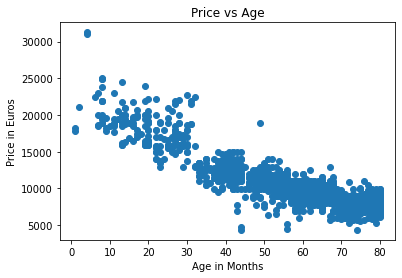

In [20]:
import matplotlib.pyplot as plt
plt.scatter(cars1['Age'], cars1['Price'])
plt.title('Price vs Age')
plt.xlabel('Age in Months')
plt.ylabel('Price in Euros')
plt.show()

In [24]:
import seaborn as sns

<AxesSubplot:xlabel='Price_Class', ylabel='count'>

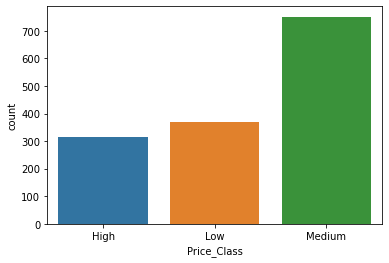

In [25]:
sns.countplot(cars1['Price_Class'])

<AxesSubplot:xlabel='FuelType', ylabel='count'>

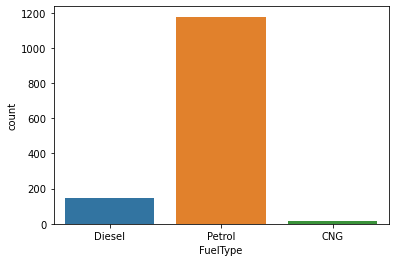

In [26]:
sns.countplot(cars1['FuelType'])

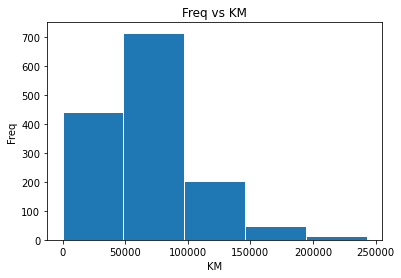

In [27]:
plt.hist(cars1['KM'],edgecolor='white', bins = 5)
plt.xlabel('KM')
plt.title('Freq vs KM')
plt.ylabel('Freq')
plt.show()

In [28]:
cars1.corr()

,Price,Age,KM,HP,CC,Doors,Weight
Price,1.000000,-0.878407,-0.574720,0.309902,0.165067,0.185326,0.581198
Age,-0.878407,1.000000,0.512735,-0.157904,-0.120706,-0.157027,-0.464299
KM,-0.574720,0.512735,1.000000,-0.335285,0.299993,-0.036191,-0.026271
HP,0.309902,-0.157904,-0.335285,1.000000,0.053758,0.097162,0.086737
CC,0.165067,-0.120706,0.299993,0.053758,1.000000,0.126768,0.651450
Doors,0.185326,-0.157027,-0.036191,0.097162,0.126768,1.000000,0.302618
Weight,0.581198,-0.464299,-0.026271,0.086737,0.651450,0.302618,1.000000


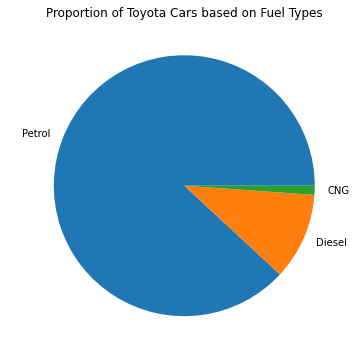

In [29]:
import seaborn as sns
plt.figure(figsize=(6,6))
plt.title("Proportion of Toyota Cars based on Fuel Types")
cars1['FuelType'].value_counts().plot(kind='pie')
plt.ylabel(" ")
plt.show(" ")

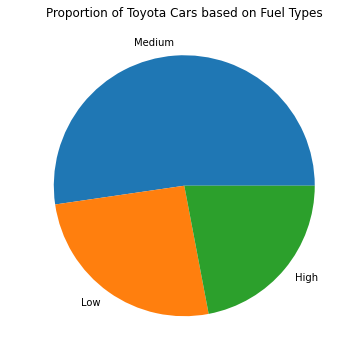

In [30]:
import seaborn as sns
plt.figure(figsize=(6,6))
plt.title("Proportion of Toyota Cars based on Fuel Types")
cars1['Price_Class'].value_counts().plot(kind='pie')
plt.ylabel(" ")
plt.show(" ")

In [32]:
cars1['Age_Converted']= cars1['Age_Converted'].astype('float64')
cars1['KM/Month']= cars1['KM/Month'].astype('float64')

In [33]:
cars1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1436 non-null   int64  
 1   Age            1336 non-null   float64
 2   KM             1421 non-null   float64
 3   FuelType       1336 non-null   object 
 4   HP             1430 non-null   float64
 5   MetColor       1286 non-null   object 
 6   Automatic      1436 non-null   object 
 7   CC             1436 non-null   int64  
 8   Doors          1436 non-null   int64  
 9   Weight         1436 non-null   int64  
 10  Price_Class    1436 non-null   object 
 11  Age_Converted  1336 non-null   float64
 12  KM/Month       1321 non-null   float64
dtypes: float64(5), int64(4), object(4)
memory usage: 189.4+ KB


In [34]:
corr = cars.corr()
corr

,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
Price,1.000000,-0.878407,-0.574720,0.309902,0.112041,0.033081,0.165067,0.581198
Age,-0.878407,1.000000,0.512735,-0.157904,-0.099659,0.032573,-0.120706,-0.464299
KM,-0.574720,0.512735,1.000000,-0.335285,-0.093825,-0.081248,0.299993,-0.026271
HP,0.309902,-0.157904,-0.335285,1.000000,0.064749,0.013755,0.053758,0.086737
MetColor,0.112041,-0.099659,-0.093825,0.064749,1.000000,-0.013973,0.029189,0.057142
Automatic,0.033081,0.032573,-0.081248,0.013755,-0.013973,1.000000,-0.069321,0.057249
CC,0.165067,-0.120706,0.299993,0.053758,0.029189,-0.069321,1.000000,0.651450
Weight,0.581198,-0.464299,-0.026271,0.086737,0.057142,0.057249,0.651450,1.000000


<AxesSubplot:>

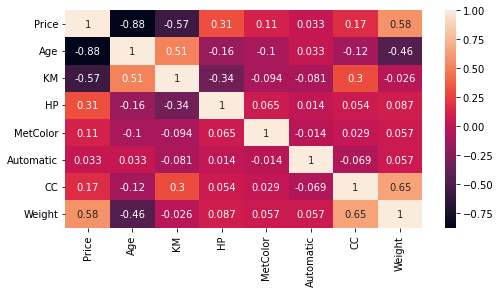

In [35]:
plt.figure(figsize=(8,4))
sns.heatmap(corr,annot = True)

# Linear Regression

In [36]:
car3 = cars.dropna()

In [38]:
s= car3['Age']
c= car3['Price']
x = np.array(s).reshape(-1,1)
y = np.array(c)

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)
print('Slope:', regressor.coef_)
print("Intercept:", regressor.intercept_)

Slope: [-170.69560407]
Intercept: 20237.109786637702


In [40]:
y_predicted= regressor.predict(x)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
rmse= mean_squared_error(y,y_predicted)
R2 = r2_score(y,y_predicted)
print('Root mean square:', rmse)
print('R2 score:', R2)


Root mean square: 3034268.418320093
R2 score: 0.7703685164960272


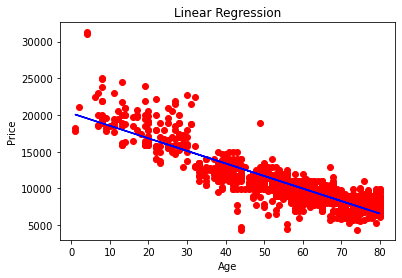

In [43]:
plt.scatter(x,y,color='red')
plt.plot(x,y_predicted, color='blue')
plt.title("Linear Regression")
plt.xlabel("Age")
plt.ylabel("Price")
plt.show()

In [44]:
x_new= np.array([37,65]).reshape(-1,1)
y_predictednew=regressor.predict(x_new)
print(y_predictednew)


[13921.37243613  9141.89552223]


In [45]:
car2 = cars.dropna()
corr = car2.corr()
corr

,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
Price,1.000000,-0.877706,-0.601944,0.334261,0.117381,0.045111,0.099880,0.532614
Age,-0.877706,1.000000,0.525695,-0.162063,-0.106291,0.026304,-0.084851,-0.442295
KM,-0.601944,0.525695,1.000000,-0.368629,-0.109031,-0.054777,0.319733,-0.029703
HP,0.334261,-0.162063,-0.368629,1.000000,0.065218,0.023112,0.037291,0.084527
MetColor,0.117381,-0.106291,-0.109031,0.065218,1.000000,-0.000476,0.009902,0.055382
Automatic,0.045111,0.026304,-0.054777,0.023112,-0.000476,1.000000,-0.053516,0.069788
CC,0.099880,-0.084851,0.319733,0.037291,0.009902,-0.053516,1.000000,0.623643
Weight,0.532614,-0.442295,-0.029703,0.084527,0.055382,0.069788,0.623643,1.000000


<AxesSubplot:>

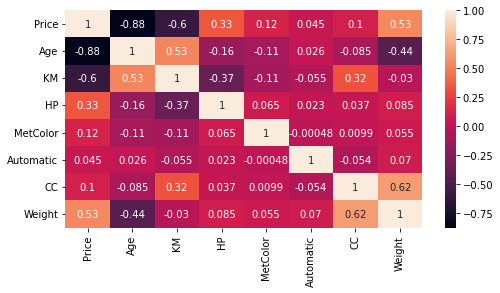

In [46]:
plt.figure(figsize=(8,4))
sns.heatmap(corr, annot=True)

# 3D Plot

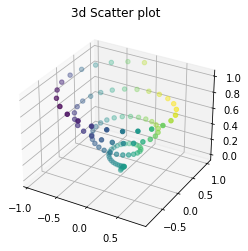

In [48]:
# importing mplot3d toolkits
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()

# syntax for 3-D projection
ax = plt.axes(projection ='3d')

# defining axes
z = np.linspace(0, 1, 100)
x = z * np.sin(25 * z)
y = z * np.cos(25 * z)
c = x + y
ax.scatter(x, y, z, c = c)

# syntax for plotting
ax.set_title('3d Scatter plot')
plt.show()